## Duration vs. Genre
#### Hypothesis:
Movies with the genre of history, biography, and war will have the longest durations because these generally have more complex plots. Animation will have the shortest duration because these usually have light plots and are more for entertainment.

In [70]:
# tidy dataset, split genre into 3 separate columns so that we can group later on
imdb_genre <- imdb_movies %>%
    separate(genre, into = c("genre1", "genre2", "genre3"), sep = ",") %>%
    mutate(duration = as.integer(duration)) %>%
    print(width = Inf)

Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 54623 rows [1, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 24, 26, 27, ...].”


# A tibble: 85,855 x 24
   imdb_title_id title                                              
   <chr>         <chr>                                              
 1 tt0000009     Miss Jerry                                         
 2 tt0000574     The Story of the Kelly Gang                        
 3 tt0001892     Den sorte drøm                                     
 4 tt0002101     Cleopatra                                          
 5 tt0002130     L'Inferno                                          
 6 tt0002199     From the Manger to the Cross; or, Jesus of Nazareth
 7 tt0002423     Madame DuBarry                                     
 8 tt0002445     Quo Vadis?                                         
 9 tt0002452     Independenta Romaniei                              
10 tt0002461     Richard III                                        
   original_title                                       year date_published
   <chr>                                               <dbl> <chr>      

In [46]:
# Shows avg duration of movie for each genre
genre_duration <- imdb_genre %>%
    group_by(genre1) %>%
    summarize(mean_duration = mean(duration, na.rm = TRUE)) %>%
    arrange(desc(mean_duration)) 
genre_duration

genre1,mean_duration
<chr>,<dbl>
Biography,113.99565
History,109.11250
Romance,107.95046
Musical,107.66358
Action,107.12494
Sport,105.25000
Drama,102.90751
War,100.75701
Adventure,99.11837


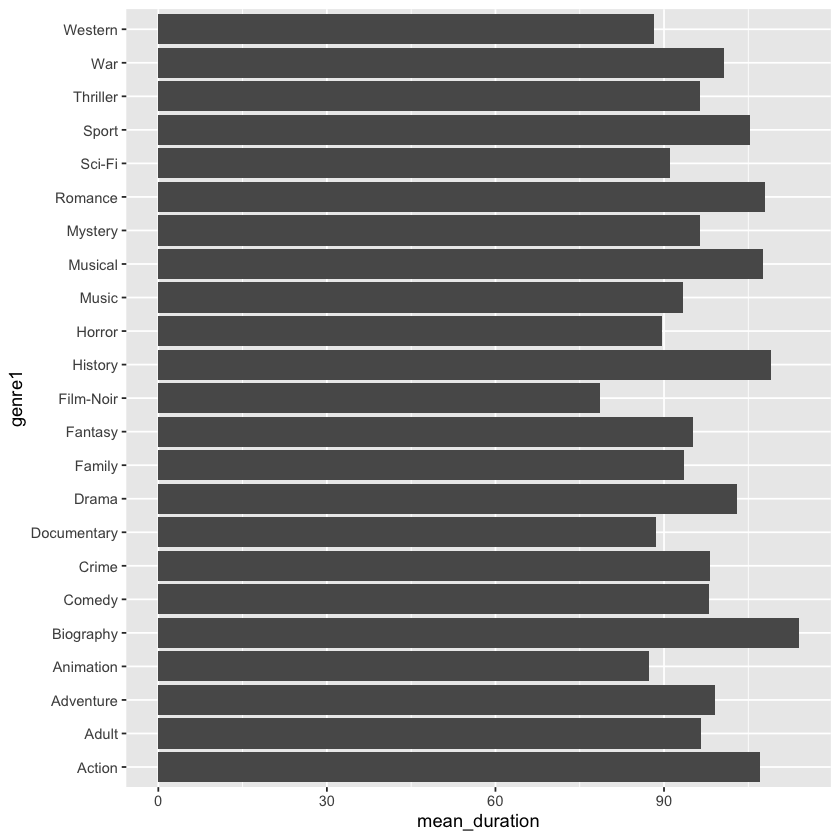

In [47]:
# stat = "identity" means we override the y-value for the bar graph
ggplot(data = genre_duration) +
    geom_bar(aes(y = genre1, x = mean_duration), stat = "identity")

Biography and History had the longest movie durations, which make sense as "real-life" movies are generally longer. Animation and film-noir had the shortest durations, which mad sense as well because those generally do not have the most complex plots.